## Teoría de Circuitos II                                                                       
### <font color='green'>Tarea semanal 4 </font>
#### Belén Torres

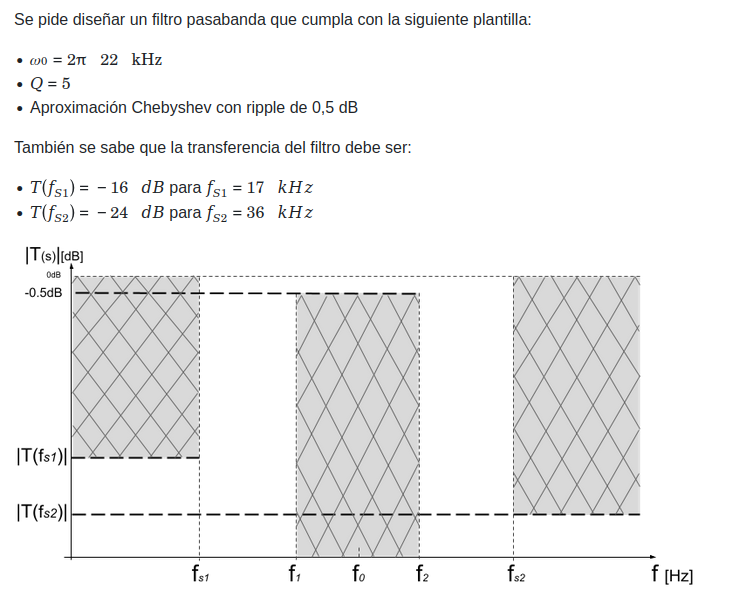

Lo primero que vamos a tener en cuenta es $𝜔_0$ como norma de frecuencia, entonces nos queda:

Como tenemos el valor de Q como dato en el enunciado podemos obtenemos el ancho del banda del filtro:

$B=\frac{1}{Q}=0,2$

sabemos que 

𝜔_{cinf}.𝜔_{csup}$=1$
 
Siendo $𝜔_{cinf}$ y $ 𝜔_{csup}$ las frecuencias de corte inferior y superior respectivamente. 

Por otro lado: 

B$=$𝜔_{csup}-𝜔_{cinf}

Reemplazando:

$𝜔_{csup}-\frac{1}{𝜔_{csup}}=0,2$

Multiplicando ambas ecuaciones por $𝜔_{csup}$

$𝜔_{csup}^2-1=0,2 𝜔_{csup}$

Despejando:

$𝜔_{csup}^2-0,2𝜔_{csup}-1=0$


Entonces hayamos las raíces del polinomio anterior

In [29]:
#Cálculo de raíces 
import numpy as np

np.roots([1,-0.2,-1]).round(2)

array([ 1.1, -0.9])

Nos quedó como resultado:

$𝜔_{cinf}=0,905$

$𝜔_{csup}=1,105$

Normalizamos las otras dos frecuencias:

$𝜔_{s1}=0,77 $

$𝜔_{s2}=1,63 $

$|T(0,77)|=-16 dB$ 

$|T(1,63)|=-24 dB$

Chequeamos ambas especificaciones para verificar cuál es la peor condición, nos queda:

### Plantilla 1

𝜔p=1

$𝜔s=Q\frac{(𝜔_{s1}^2-1)}{𝜔_{s1}}=2,60$

$\alpha_{max}=0,5dB$

$\alpha_{min}=16dB$

In [62]:
alfa_min=16 # en dB
alfa_max=0.5 # en dB
wp=1
ws=2.64
#Las expresiones de los cálculos son los siguientes:
epsilon=np.sqrt(10**(alfa_max/10)-1)
N=np.arccosh(np.sqrt((10**(alfa_min/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon.round(2))
print("Orden:",N)

Episilon: 0.35
Orden: 3.0


### Plantilla 2

𝜔p=1

$𝜔s=Q\frac{(𝜔_{s2}^2-1)}{𝜔_{s2}}=4,06$

$\alpha_{max}=0,5dB$

$\alpha_{min}=24dB$

In [42]:
alfa_min=24 # en dB
alfa_max=0.5 # en dB
wp=1
ws=4.06
epsilon=np.sqrt(10**(alfa_max/10)-1)
N=np.arccosh(np.sqrt((10**(alfa_min/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon.round(2))
print("Orden:",N)

Episilon: 0.35
Orden: 3.0


Realizo un prototipo Pasabajo de orden 3 con la plantilla 2.

Sabiendo que nuestro filtro es de tercer orden obtenemos los polinomios con aproximación de *Aproximación Chebyshev* :
        
$$ C_n(𝜔)=2𝜔 C_{n-1}(𝜔)-C_{n-2}(𝜔)$$

$$ C_0(𝜔)=1 $$
$$ C_1(𝜔)= 𝜔 $$
$$ C_2(𝜔)=2𝜔^2-1 $$
$$ C_3(𝜔)=2𝜔 (2𝜔^2-1)-𝜔 =4𝜔^3-3𝜔 $$

Armando el denominador queda:

$Den(j𝜔)^2=1+𝜖^2 \cdot C_3^2(𝜔) $

$Den(j𝜔)^2=1+𝜖^2 \cdot (4𝜔^3−3𝜔)^2$

$𝜔^3=\frac{s^3}{j^3}=\frac{s^3}{-j} $

$𝜔=\frac{s}{j} $

$Den(s)^2=1+𝜖^2 \cdot (\frac{-4s^3}{j}-\frac{3s}{j})^2 $

$Den(s)^2=1+𝜖^2 \cdot \frac{1}{j^2}(-4s^3-3s)^2 $

$Den(s)^2=1-𝜖^2 \cdot (-4s^3-3s)^2 $

$Den(s)^2=1-𝜖^2 \cdot (16s^6+24s^4+9s^2) $

Obtenemos los polos y nos quedamos con aquellos que tienen parte real negativa:

In [13]:
from sympy import *
from sympy.solvers import solve
import numpy as np
from sympy import init_printing
init_printing() 

epsilon=0.35
s=Symbol('s') 
cn=(-4*s**3-3*s)**2 
den=1-(epsilon**2)*expand(cn)
den=poly(den)
den=tuple(den.all_coeffs())
polos=np.roots(den).round(2)
polost=[]
for polo in polos:
    if (polo.real < 0):
        if(polo.imag==0):
            polost.append(polo.real)
        else:polost.append(polo)
print(polost)  

[(-0.31+1.02j), (-0.31-1.02j), -0.63]


Armamos el denominador sabiendo que la sección de segundo orden cuyo polo es $\alpha±j\beta$

$$T_{sos}(s)=\frac{\alpha^2+\beta^2}{s^2-2\alpha s+\alpha^2+\beta^2}$$


In [43]:
den_2sos=[]
polos_simply=[]
polos_simply.append(polost[0])
for i in range(1,len(polost)):
    if((polost[i].real!=polost[i-1].real) or (polost[i].imag!=-polost[i-1].imag)):
        polos_simply.append(polost[i])
for polo in polos_simply:
    if(polo.imag!=0):
        den_2sos.append([1, -2*(polo.real).round(2), (polo.real**2+polo.imag**2).round(2)])
    else:
        den_2sos.append([1, -polo.real])
print(den_2sos)
    

[[1, 0.62, 1.14], [1, 0.63]]


$$T(s)=\frac{1,14}{s^2+0,62s+1,14} \cdot \frac{0,63}{s+0,63} $$

Como queremos pasarlo a Pasabanda le aplicamos el nucleo de transformación en donde:


$$s=Q\frac{S^2+1}{S}$$

Teniendo el filtro normalizado para 1


$$T(s)=\frac{1,14}{{Q^2(\frac{S^2+1}{S})}^2+0,62{Q\frac{S^2+1}{S}}+1,14} \cdot \frac{0,63}{{Q\frac{S^2+1}{S}}+0,63} $$

$$T(s)=\frac{1,14}{{Q^2(\frac{S^4+2S^2+1}{S^2})}+0,62{Q\frac{S^2+1}{S}}+1,14} \cdot \frac{0,63}{{Q\frac{S^2+1}{S}}+0,63} $$

$$T(s)=\frac{1,14S^2}{{Q^2(S^4+2S^2+1)}+0,62S{Q (S^2+1)}+1,14S^2} \cdot \frac{0,63S}{Q(S^2+1)+0,63S} $$

$$T(s)=\frac{1,14S^2}{Q^2S^4+2Q^2S^2+Q^2+0,62S(QS^2+Q)+1,14S^2} \cdot \frac{0,63S}{QS^2+Q+0,63S} $$

$$T(s)=\frac{1,14S^2}{Q^2S^4+2Q^2S^2+Q^2+0,62QS^3+Q0,62S+1,14S^2} \cdot \frac{\frac{0,63S}{Q}}{S^2+1+\frac{0,63S}{Q}} $$

$$T(s)=\frac{1,14S^2}{Q^2S^4+0,62QS^3+2Q^2S^2+1,14S^2+0,62QS+Q^2}  \cdot \frac{\frac{0,63S}{Q}}{S^2+\frac{0,63S}{Q}+1} $$

$$T(s)=\frac{\frac{1,14S^2}{Q^2}}{S^4+\frac{0,62S^3}{Q}+S^2(2+\frac{1,14}{Q^2})+\frac{0,62}{Q}S+1}  \cdot \frac{\frac{0,63S}{Q}}{S^2+\frac{0,63S}{Q}+1} $$

Reemplazando que Q=5

$$T(s)=\frac{0,0456S^2}{S^4+0,124S^3+2,0456S^2+0,124S+1}  \cdot \frac{0.124S}{S^2+0,124S+1} $$

Vamos a verificar todo:

In [48]:
Tpb=(1.14)/(s**2+0.62*s+1.14) * ((0.63)/(s+0.63))
Tpb=expand(Tpb)
Tpb

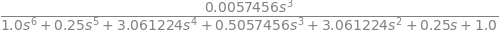

In [49]:
Q=5
monico=true
if monico==true:
    z=((s**2+1)/s)  #agrego el Q a mano en cada expresión para que me quede mónico
    Tpband=(1.14/Q**2)/(z**2+0.62*z/Q+1.14/Q**2) * ((0.63/Q)/(z+0.63/Q))
else:
    z=(Q*(s**2+1)/s)
    Tpband=(1.01)/(z**2+0.62*z+1.14) * ((0.63)/(z+0.63))
    
Tpband=cancel(Tpband)
Tpband

In [46]:
polos=np.roots([1,0.25,3.061224,0.5057456,3.061224,0.25,1])
polos.round(2)

array([-0.03+1.11j, -0.03-1.11j, -0.06+1.j  , -0.06-1.j  , -0.03+0.9j ,
       -0.03-0.9j ])

In [22]:
np.union1d(np.roots([1,0.124,2.0456,0.124,1]),np.roots([1,0.124,1]))
print (polos.round(2))


[-0.03+1.11j -0.03-1.11j -0.06+1.j   -0.06-1.j   -0.03+0.9j  -0.03-0.9j ]


Obtuvimos los mismos polos. Vamos a obtener ahora las secciones de segundo orden:

In [24]:
den_2sos=[]
polos_simply=[]
polos_simply.append(polos[0])
for i in range(1,len(polos)):
    if((polos[i].real!=polos[i-1].real) or (polos[i].imag!=-polos[i-1].imag)):
        polos_simply.append(polos[i])
for polo in polos_simply:
    if(polo.imag!=0):
        den_2sos.append([1, -2*(polo.real), (polo.real**2+polo.imag**2)])
    else:
        den_2sos.append([1, -polo.real])
print(den_2sos)

[[1, 0.06830478921127536, 1.2264032803537153], [1, 0.125999999999998, 1.0000000000000306], [1, 0.05569521078872566, 0.8153924700132492]]


In [25]:
w01=np.sqrt(den_2sos[0][2])
w02=np.sqrt(den_2sos[2][2])
w03=np.sqrt(den_2sos[1][2])
Q1=w01/den_2sos[0][1]
Q2=w02/den_2sos[2][1]
Q3=w03/den_2sos[1][1]
print("w01:",w01.round(3))
print("Q1:",Q1.round(3))
print("w02:",w02.round(3))
print("Q2:",Q2.round(3))
print("w03:",w03.round(3))
print("Q3:",Q3.round(3))

w01: 1.107
Q1: 16.213
w02: 0.903
Q2: 16.213
w03: 1.0
Q3: 7.937


$$T(s)= \frac{0.068S}{S^2+0.068S+1.226} \cdot \frac{0.126S}{S^2+0.126S+1} \cdot \frac{0.056S}{S^2+0.056S+0.815} $$

De la relacíón de ganancia de la transferencia completa sería:

$0,068 x $0,126 x $0,056=$ 0,000479


$\frac{0,0057456}{0,000479808}=11,97$ Veces falta amplificar


$$T(s)= 11,97 \cdot \frac{0.068S}{S^2+0.068S+1.226} \cdot \frac{0.126S}{S^2+0.126S+1} \cdot \frac{0.056S}{S^2+0.056S+0.815} $$



## Secciones de pasivas de segundo orden para implementar el filtro:
    
    




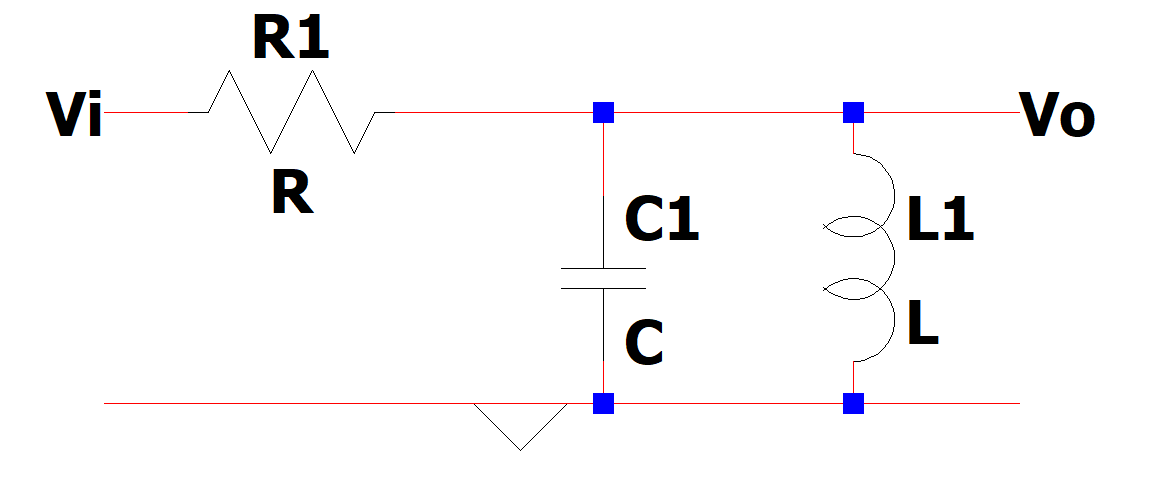

Cuya transferencia viene dada por:

$$T(S)= \frac{\frac{S}{CR}}{S^2+\frac{S}{CR}+\frac{1}{LC}} $$

si $C=1$

Primera sección:

$0,068=\frac{1}{R}$

$1,226=\frac{1}{L}$

$R=14,7$

$L=0,8156$

Para la segunda sección:

$0,126=\frac{1}{R}$

$1=\frac{1}{L}$

$R=7,93$

$L=1$

Para la tercer sección:

$0,056=\frac{1}{R}$

$0,815=\frac{1}{L}$

$R=17,85$

$L=1,22$




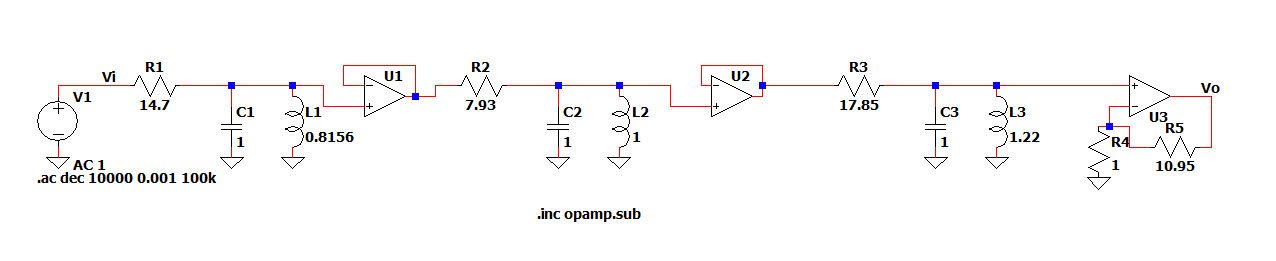


Desnormalizamos los componentes para $\omega=2\pi22KHz$

Elegimos una norma de impedancia = $1K\Omega$

$C'=\frac{C}{2\pi\cdot 22KHz\cdot 1K\Omega}$

$L'=\frac{L \cdot 1K\Omega}{2\pi22KHz}$

$R'=R 1K\Omega$

### Circuito desnormalizado:

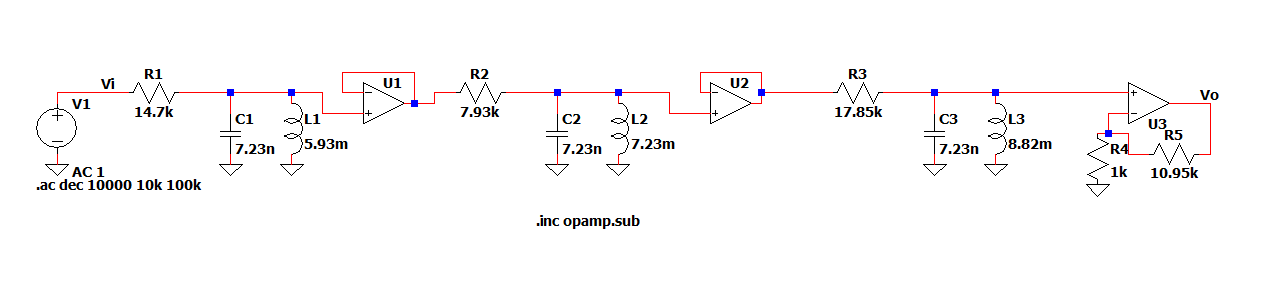

## Simulación en LtSpice

### Salida del filtro

De la simulación se puede observar la **banda de paso** y las **bandas rechazo**,y es posible medir el ancho de banda B$=$𝜔_{csup}-𝜔_{cinf}.
Se puede también observar dos frecuancias de corte, una inferior y otra superior. Este fitro solo atenúa las señales cuya frecuencia sea menor a la frecuencia de corte inferior o aquella frecuancias mayores a la frecuencia superior. Por tanto, solo permiten el paso de un rango o banda de frecuencias sin atenuar.

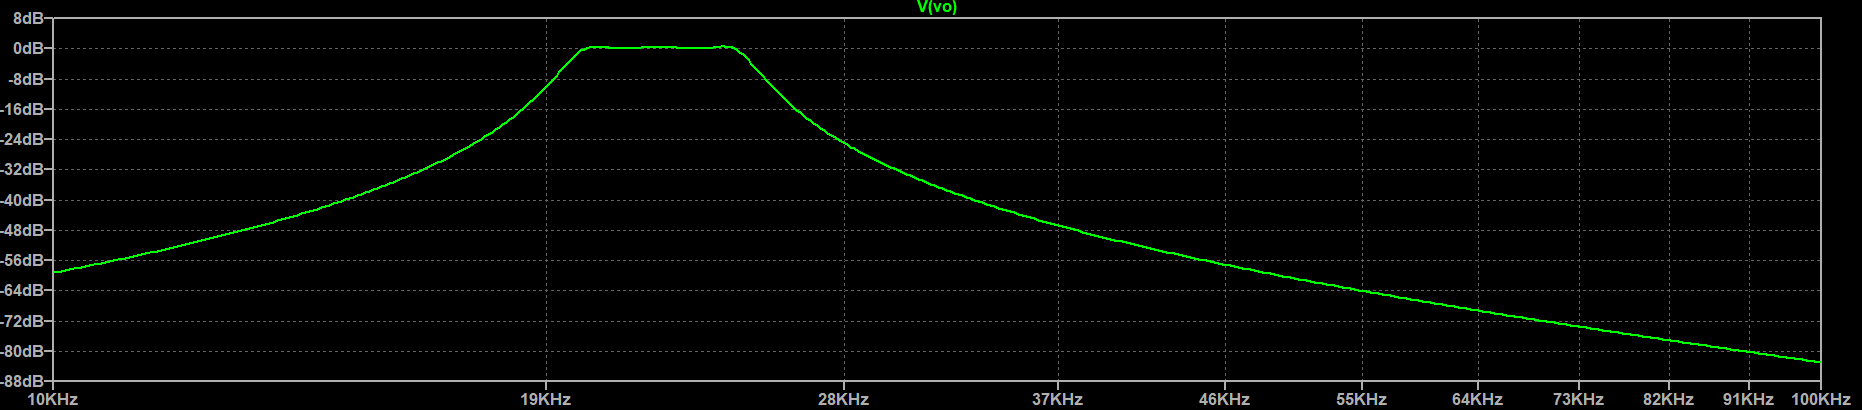

Si hacemos zoom en la banda pasante podemos observar que $𝜔_0$ se encuentra efectivamente en 22 KHz tal como lo pedía el enunciado

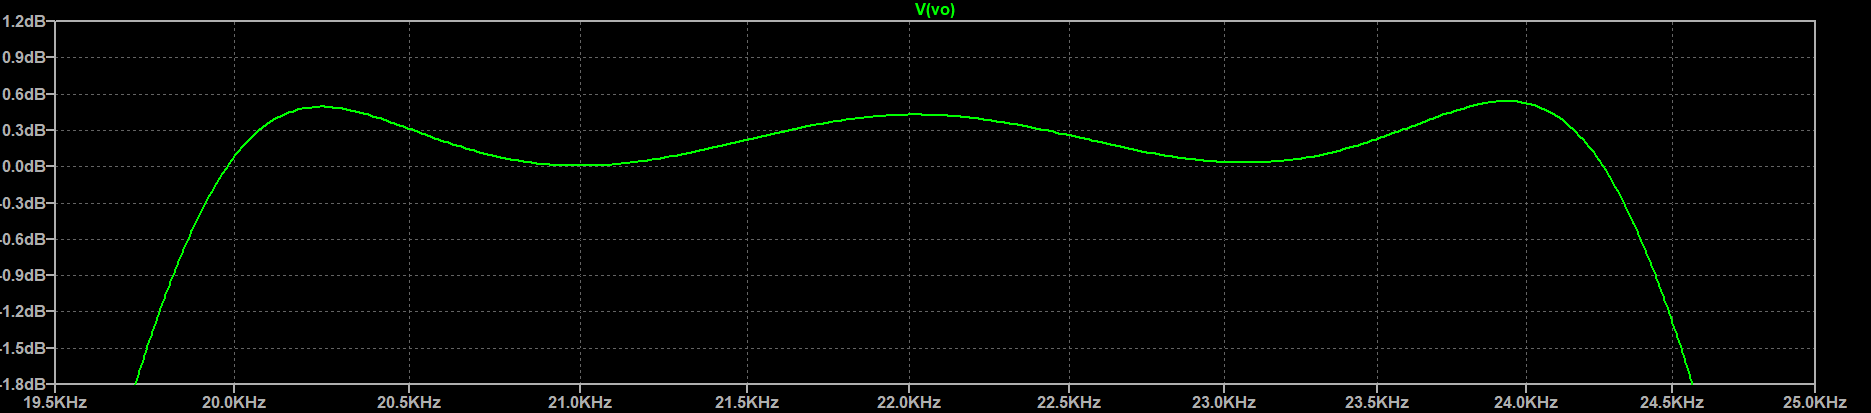





Una de las aplicaciones de este tipo de filtros es para la  ecualización de audio,con la eliminación de ruidos que parecen
junto a una señal.